### Loading the saved data & target

In [17]:
import numpy as np

data = np.load('dataChestXray.npy')
target = np.load('targetChestXray.npy')
print(data.shape[1:])

(128, 128, 1)


### CNN Architecture

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Splliting the data and target

In [19]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.2)

### Training the dataset

In [20]:
history = model.fit(train_data,train_target,epochs=8)

Epoch 1/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 26s 159ms/step - accuracy: 0.7156 - loss: 0.5950
Epoch 2/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.7310 - loss: 0.5942
Epoch 3/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - accuracy: 0.7375 - loss: 0.5836
Epoch 4/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.7368 - loss: 0.5812
Epoch 5/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - accuracy: 0.7348 - loss: 0.5846
Epoch 6/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - accuracy: 0.7464 - loss: 0.5732
Epoch 7/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.7399 - loss: 0.5773
Epoch 8/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.7394 - loss: 0.5766


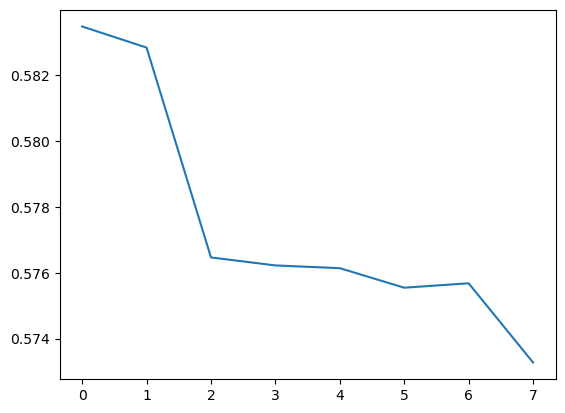

In [21]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

[0.7368168830871582, 0.7428091764450073, 0.7428091764450073, 0.7428091764450073, 0.7428091764450073, 0.7428091764450073, 0.7428091764450073, 0.7428091764450073]
0.7428091764450073


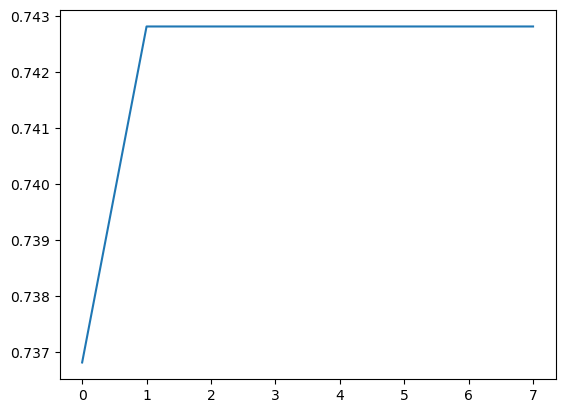

In [22]:
plt.plot(history.history['accuracy'])
a = history.history['accuracy']
print(a)
print(a[-1])

In [23]:
print(model.evaluate(test_data,test_target))

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7436 - loss: 0.5692
[0.5695881247520447, 0.7432950139045715]


### Saving the model

In [24]:
model.save("Pnemonia_predictions_using_chest_xray_99.20.h5")